In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
rhoa = 100

# Set initial positions for ABMN
A = (-1, 0)
M = (-0.5, 0)
N = (0.5, 0)
B = (1, 0)

def schlumberger(A, B, M, N, rhoa):
    ax = A[0]
    ay = A[1]
    
    bx = B[0]
    by = B[1]
    
    mx = M[0]
    my = M[1]
    
    nx = N[0]
    ny = N[1]
    
    k = 2*np.pi/(((ax-mx)**2 + (ay-my)**2)**-0.5 - ((bx-mx)**2 + (by-my)**2)**-0.5 - ((ax-nx)**2 + (ay-ny)**2)**-0.5 + ((bx-nx)**2 + (by-ny)**2)**-0.5)
    
    r = rhoa/k
    
    return r, k

def resistivity(A, B, M, N, r):
    ax = A[0]
    ay = A[1]
    
    bx = B[0]
    by = B[1]
    
    mx = M[0]
    my = M[1]
    
    nx = N[0]
    ny = N[1]
    
    k = 2*np.pi/(((ax-mx)**2 + (ay-my)**2)**-0.5 - ((bx-mx)**2 + (by-my)**2)**-0.5 - ((ax-nx)**2 + (ay-ny)**2)**-0.5 + ((bx-nx)**2 + (by-ny)**2)**-0.5)
    rhoa = r*k
    
    return rhoa, k

In [67]:
import csv

# Let me actually get ABMN positions from Raul's data.
rows = []
with open('cowsjackpot.csv', newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
     for row in spamreader:
         rows.append(', '.join(row))

In [68]:
import io
colnames=["N", "a", "n", "ab2", "r", "rhoa", "sigma"] 
dcowsns = pd.read_csv(io.StringIO('\n'.join(rows[2:14])), names=colnames)
dcowses = pd.read_csv(io.StringIO('\n'.join(rows[18:30])), names=colnames)
mcowsns = pd.read_csv(io.StringIO('\n'.join(rows[34:47])), names=colnames)

djackns = pd.read_csv(io.StringIO('\n'.join(rows[51:64])), names=colnames)
mjackns = pd.read_csv(io.StringIO('\n'.join(rows[68:])), names=colnames)



In [82]:
df2 = dcowsns

n = df2["n"]
a = df2["a"]

mx = -a/2
my =  np.zeros(len(a))
M = np.array([mx, my])

nx = a/2
ny =  np.zeros(len(a))
N = np.array([nx, ny])

ax = -(n+1/2)*a
ay =  np.zeros(len(a))
A = np.array([ax, ay])

bx = (n+1/2)*a
by = np.zeros(len(a))
B = np.array([bx, by])

In [87]:
# Now looking at the schlumberger response.
r, k = schlumberger(A, B, M, N, rhoa)
check_rhoa, k = resistivity(A, B, M, N, r)
ab2 = bx

Text(0, 0.5, 'AB/2 (m)')

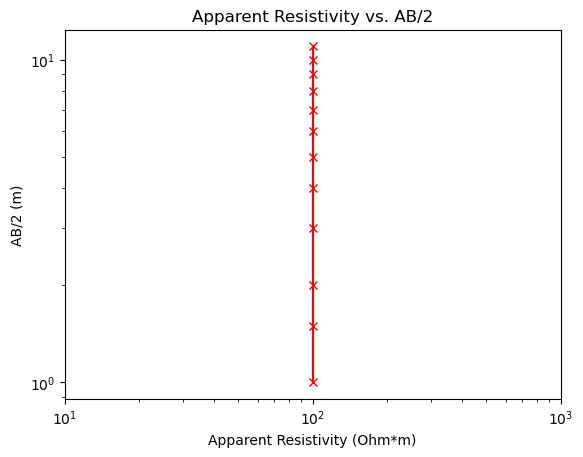

In [90]:
# Graphing.
plt.loglog(np.array(check_rhoa).reshape(len(check_rhoa),1), np.array(ab2).reshape(len(ab2),1), 'rx-', label='measured')
plt.title("Apparent Resistivity vs. AB/2")
plt.xlabel("Apparent Resistivity (Ohm*m)")
plt.ylabel("AB/2 (m)")

Text(0, 0.5, 'AB/2 (m)')

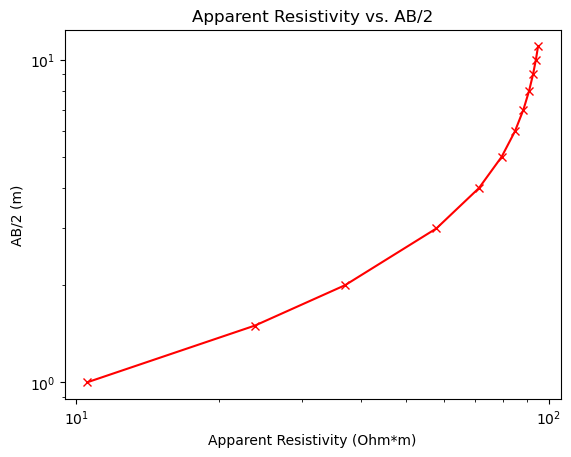

In [94]:
# Now lets add a contact resistiance in parallel.

cres = 5 # 5 ohms contact resistance
rcres = (1/r + 1/cres)**-1

# Looking at resistivity for this.
cres_rhoa, k = resistivity(A, B, M, N, rcres)

# Plotting (and crossing fingers)
plt.loglog(np.array(cres_rhoa).reshape(len(cres_rhoa),1), np.array(ab2).reshape(len(ab2),1), 'rx-', label='measured')
plt.title("Apparent Resistivity vs. AB/2")
plt.xlabel("Apparent Resistivity (Ohm*m)")
plt.ylabel("AB/2 (m)")

In [76]:
# Bingo! Plotting both on top of 

array([42.44131816, 15.91549431,  8.48826363,  3.63782727,  2.02101515,
        1.28610055,  0.8903773 ,  0.65294336,  0.49930963,  0.39419181,
        0.31910766,  0.26361067])

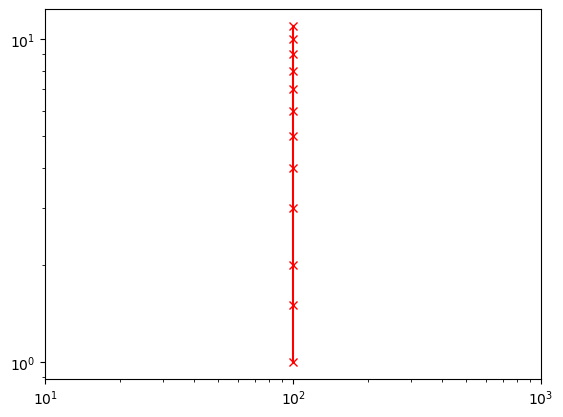